**Adrianus Ezeekiel Dyarsa Amarta**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np


In [26]:

# Load datasets
features_df = pd.read_csv('C:\\Users\\Adrianus Ezeekiel\\Documents\\Portfolio\\Sales Analyst\\Features data set.csv')
sales_df = pd.read_csv('C:\\Users\\Adrianus Ezeekiel\\Documents\\Portfolio\\Sales Analyst\\sales data-set.csv')
stores_df = pd.read_csv('C:\\Users\\Adrianus Ezeekiel\\Documents\\Portfolio\\Sales Analyst\\stores data-set.csv')

# Display the first few rows of each dataset to understand their structure
features_head = features_df.head()
sales_head = sales_df.head()
stores_head = stores_df.head()

# Display basic information about each dataset
features_info = features_df.info()
sales_info = sales_df.info()
stores_info = stores_df.info()

features_head, sales_head, stores_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         4

(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  05/02/2010        42.31       2.572        NaN        NaN   
 1      1  12/02/2010        38.51       2.548        NaN        NaN   
 2      1  19/02/2010        39.93       2.514        NaN        NaN   
 3      1  26/02/2010        46.63       2.561        NaN        NaN   
 4      1  05/03/2010        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143         8.106      False  ,
    Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  05/02/2010      24924.50      False
 1      1

In [27]:
# Convert 'Date' columns to datetime format in all datasets
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')

# Merge datasets
# Step 1: Merge sales and features datasets on 'Store' and 'Date'
sales_features_merged = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')

# Step 2: Merge the result with stores dataset on 'Store'
full_data = pd.merge(sales_features_merged, stores_df, on='Store', how='left')

# Check the merged dataset structure
merged_head = full_data.head()
merged_info = full_data.info()

merged_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [28]:
# Descriptive statistics
print(full_data.describe())

# Missing values check
print(full_data.isnull().sum())


               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  421570.000000  421570.000000  150681.000000   
mean    15981.258123      60.090059       3.361027    7246.420196   
min     -4988.940000      -2.060000       2.472000       0.270000   
25%      2079.650000      46.680000       2.933000    2240.270000   
50%      7612.030000    

In [29]:
print(full_data.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')


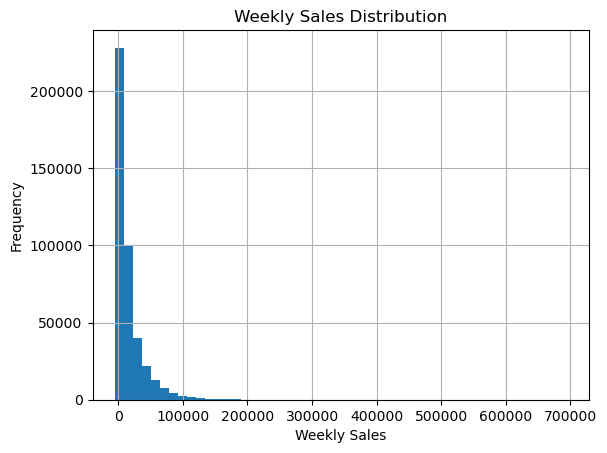

In [30]:
# Data distribution visualization for 'Sales'
full_data['Weekly_Sales'].hist(bins=50)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Feature engineering: Create 'Day_of_Week' and 'Month' from 'Date'
full_data['Day_of_Week'] = full_data['Date'].dt.dayofweek
full_data['Month'] = full_data['Date'].dt.month

# One-hot encoding for categorical column 'Type'
full_data = pd.get_dummies(full_data, columns=['Type'])

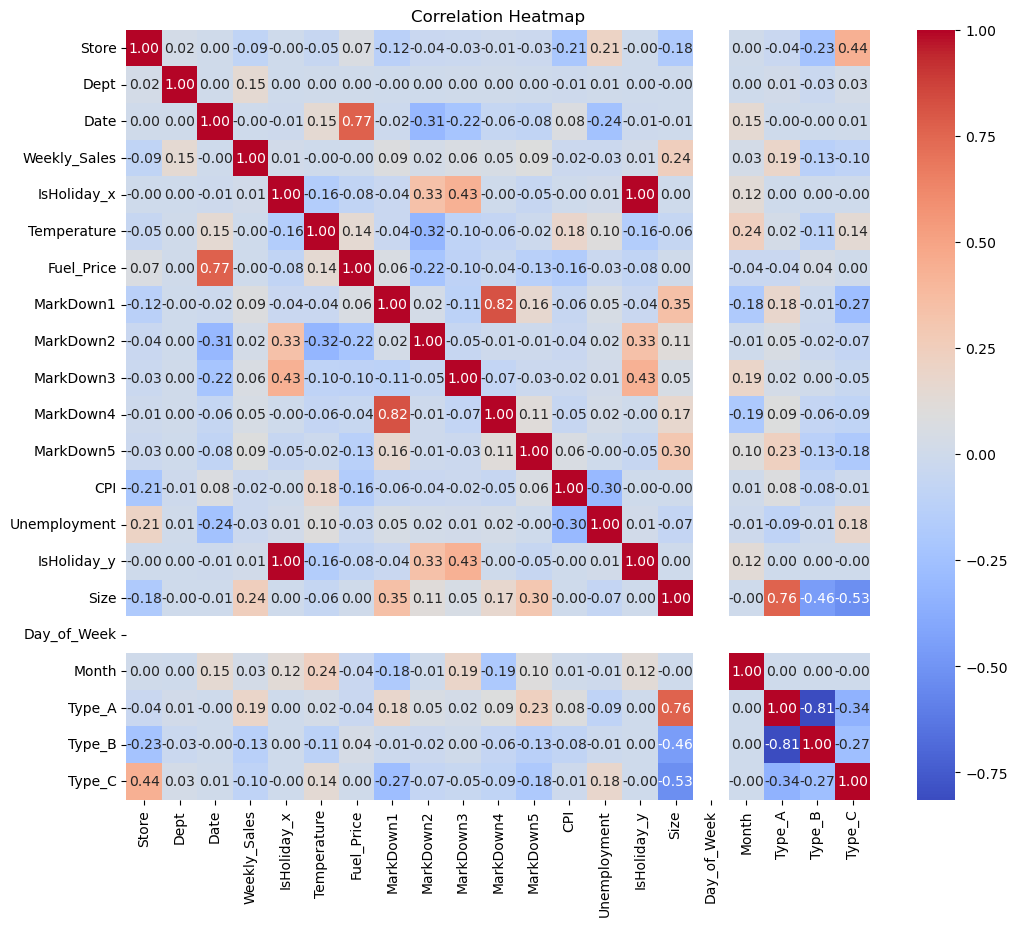

In [32]:
# Correlation heatmap
correlation_matrix = full_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

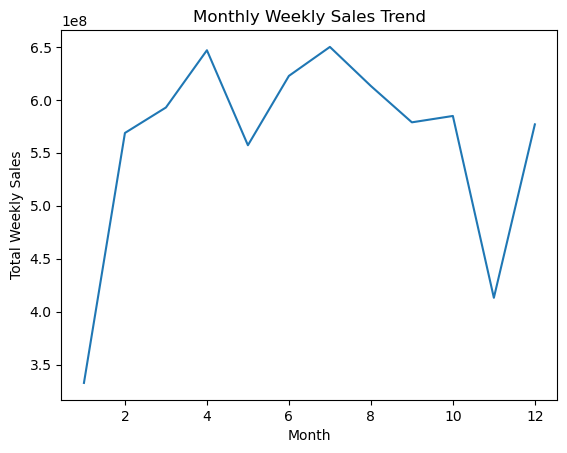

In [33]:
# Sales trends over time (monthly sales)
monthly_sales = full_data.groupby('Month')['Weekly_Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Weekly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.show()

In [34]:
# Imputasi missing values dengan mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split untuk modeling
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [35]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

In [36]:

# Hitung RMSE secara manual
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 21754.568901568076
R²: 0.09244948509722295
